n this mission, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. The unemployment dataset contains 2 columns:

- DATE: date, always the first of the month. Examples:
    - 1948-01-01: January 1, 1948.
    - 1948-02-01: February 1, 1948.
    - 1948-03-01: March 1, 1948.
    - 1948-12-01: December 1, 1948.
- VALUE: the corresponding unemployment rate, in percent.

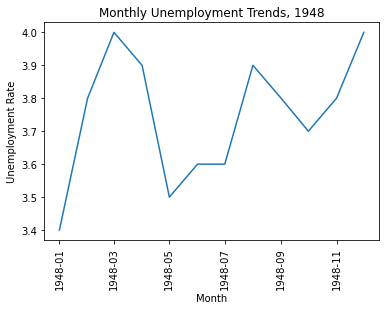

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

plt.plot(unrate['DATE'][:12], unrate['VALUE'][:12])
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

### Matplotlib classes

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a **Figure object**)
- a container for the plot was positioned on a grid (the plot returned as an **Axes object**)
- visual symbols were added to the plot (using the **Axes methods**)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling `pyplot.figure()`:

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
    - markers
    - lines
    - gridlines
    
While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use `Figure.add_subplot`. This will return a new Axes object, which needs to be assigned to a variable:

```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

If we want the figure to contain 2 plots, one above the other, we need to write:

In [3]:
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using plt.show():

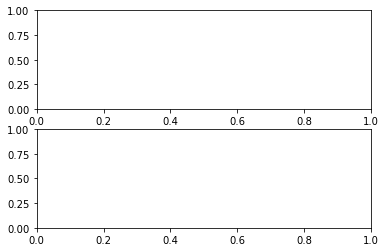

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated in the last mission using the plot() function:

- the x-axis and y-axis values ranging from 0.0 to 1.0
- no gridlines
- no data

The main difference is that this plot ranged from 0.0 to 1.0 instead of from -0.06 to 0.06, which is a quirk suggested by a difference in default properties.

Now that we have a basic understanding of the important matplotlib classes, we can create multiple plots to compare monthly unemployment trends. If you recall, we need to specify the position of each subplot on a grid. Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:

![Image](img/subplots.png)


When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.

![Image](img/subplot2.png)

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:

![Image](img/subp.png)

### Adding data

To generate a line chart within an Axes object, we need to call Axes.plot() and pass in the data you want plotted:

In [5]:
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]

ax1.plot(x_values, y_values)

Like pyplot.plot(), the Axes.plot() will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call Axes.plot() and pass in the data we want to use in that plot.

**Example**

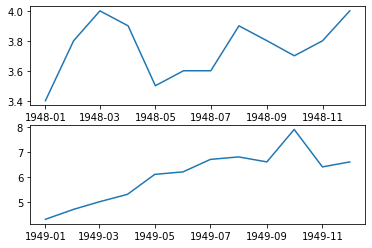

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(unrate['DATE'][:12], unrate['VALUE'][:12])

ax2 = fig.add_subplot(212)
ax2.plot(unrate['DATE'][12:24], unrate['VALUE'][12:24])

plt.show()

### Format and spacing

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same:

![Image](img/encimada.png)

This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the figsize parameter when we call plt.figure():

This parameter takes in a tuple of floats:

```
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The dpi parameter, or dots per inch, and the figsize parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.

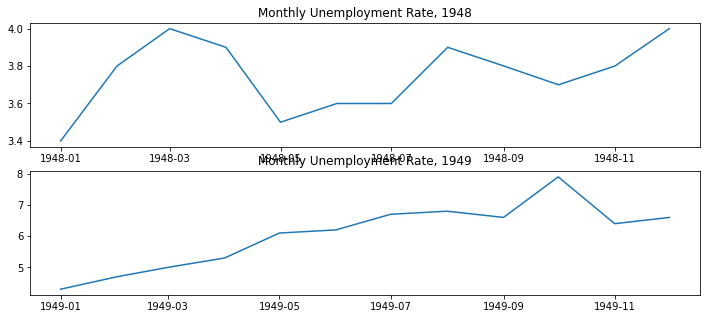

In [9]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(unrate['DATE'][:12], unrate['VALUE'][:12])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate['DATE'][12:24], unrate['VALUE'][12:24])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()


#### Comparing across more years

We're going to visualize data from a few more years to see if we find any evidence for seasonality between those years. Because we're going to need to plot multiple years, we can use a loop so that we're not repeating unnecessary code. 

Let's look at how we could produce a plot similar to the one on the previous screen using a loop and range():

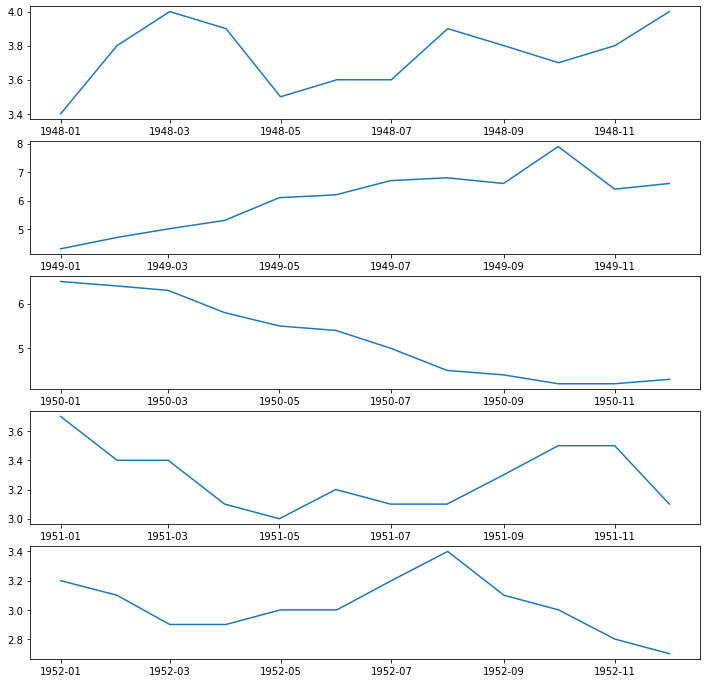

In [13]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

### Overlaying line charts

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the DATE column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

In [17]:
unrate['MONTH'] = unrate['DATE'].dt.month

Calling pandas.Series.dt.month returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.). Under the hood, pandas applies the datetime.date.month attribute from the datetime.date class over each datetime value in the DATE column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

In the last mission, we called pyplot.plot() to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot.

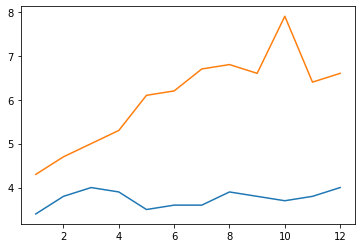

In [18]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. **This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.**

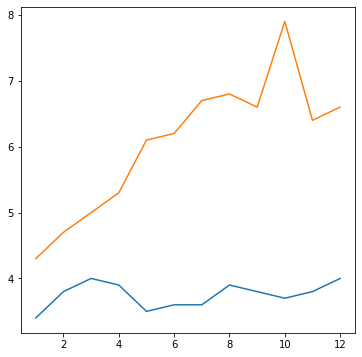

In [22]:
fig = plt.figure(figsize=(6,6))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the c parameter when calling plot():

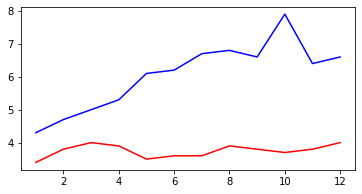

In [23]:

unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize = (6,3))

plt.plot(unrate['MONTH'][:12], unrate['VALUE'][:12], c = 'red')
plt.plot(unrate['MONTH'][12:24], unrate['VALUE'][12:24], c = 'blue')
plt.show()

Let's visualize 5 years worth of unemployment rates on the same subplot.

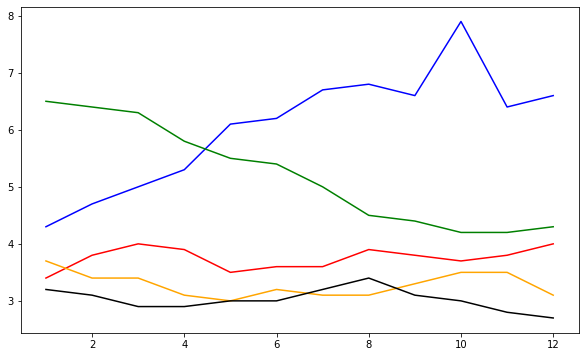

In [24]:
fig = plt.figure(figsize=(10,6))

for i, c in enumerate(['red', 'blue', 'green', 'orange', 'black']):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c = c)

plt.show()

### Adding a legend

To help remind us which year each line corresponds to, we can add a legend that links each color to the year the line is representing. Here's what a legend for the lines in the last screen could look like:

![Image](img/legend.png)

When we generate each line chart, we need to specify the text label we want each color linked to. The pyplot.plot() function contains a label parameter, which we use to set the year value:

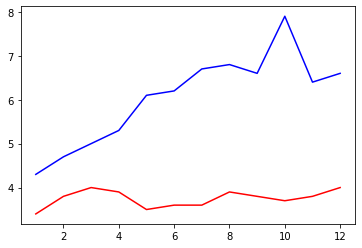

In [28]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')

We can create the legend using pyplot.legend and specify its location using the loc parameter:

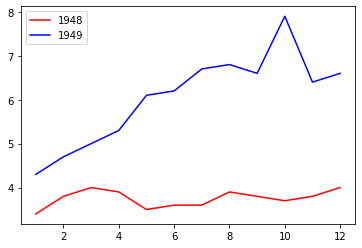

In [29]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')

plt.legend(loc='upper left')

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use plt.plot() and plt.legend(), the Axes.plot() and Axes.legend() methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use Axes.legend() instead.

### Final tweaks

Instead of referring back to the code each time we want to confirm what subset each line corresponds to, we can focus our gaze on the plotting area and use the legend. At the moment, the legend unfortunately covers part of the green line (which represents data from 1950). Since the legend isn't critical to the plot, we should move this outside of the coordinate grid. We'll explore how to do so in a later course because it requires a better understanding of some design principles as well as matplotlib.

Before we wrap up this mission, let's enhance the visualization by adding a title and labels for both axes. To set the title, we use pyplot.title() and pass in a string value:

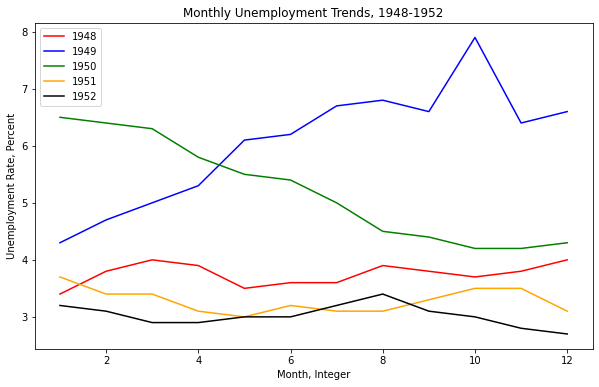

In [30]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')

plt.title('Monthly Unemployment Trends, 1948-1952')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.show()